# EI network - Backprop (Dale's Law, fixed inhibition)

Here we will show the analysis for a single example seed of a network described in [Galloni et al. 2025.](https://www.biorxiv.org/content/10.1101/2025.05.22.655599v2)

In [18]:
import EIANN as eiann
from EIANN import utils as ut
eiann.update_plot_defaults()
root_dir = ut.get_project_root()

#### Load MNIST data

In [19]:
train_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders()

#### Load optimized pre-trained EIANN model: EI network trained with Backprop (fixed Soma-I weights)

In [20]:
network_name = "20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_complete_optimized"   
network_seed = 66049
data_seed = 257

If you want to train this network configuration from scratch, you can build a new network object directly from the .yaml configuration file and then train it:

```python
# Create network object
config_file_path = f"{root_dir}/EIANN/network_config/mnist/{network_name}.yaml"
network = ut.build_EIANN_from_config(config_file_path, network_seed=network_seed)

# Train network
data_generator.manual_seed(data_seed)
network.train(train_dataloader, val_dataloader, 
              epochs = 1,
              samples_per_epoch = 20_000, 
              val_interval = (0, -1, 100), 
              store_history = True,
              store_history_interval = (0, -1, 100), 
              store_dynamics = False, 
              store_params = True,
              status_bar = True)

# Optional: Save network object to pickle file
saved_network_path = f"{root_dir}/EIANN/data/mnist/{network_name}_{network_seed}_{data_seed}.pkl"
ut.save_network(spiral_net, path=saved_network_path)


In this case, since we have already trained the network, we will simply load the saved network object that is stored in a pickle (.pkl) file:

In [21]:
saved_network_path = f"{root_dir}/EIANN/data/saved_network_pickles/mnist/{network_name}_{network_seed}_{data_seed}.pkl"
network = ut.load_network(saved_network_path)
network.name = network_name
network.seed = f"{network_seed}_{data_seed}"

Loading network from '/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/data/saved_network_pickles/mnist/20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_complete_optimized_66049_257.pkl'
Network successfully loaded from '/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/data/saved_network_pickles/mnist/20231129_EIANN_2_hidden_mnist_bpDale_relu_SGD_config_G_complete_optimized_66049_257.pkl'


### 3. Training results

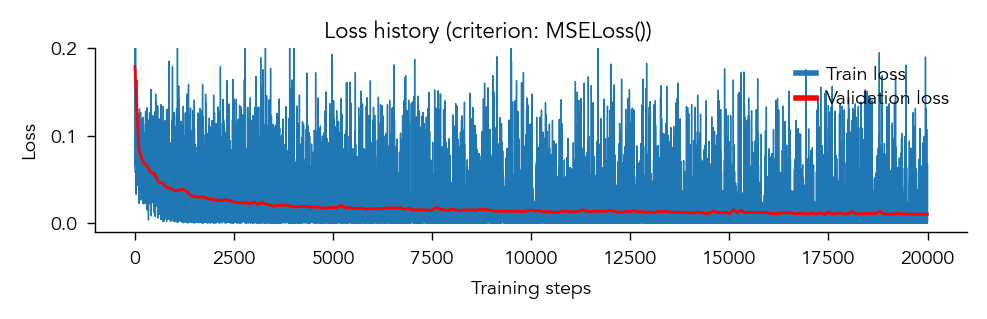

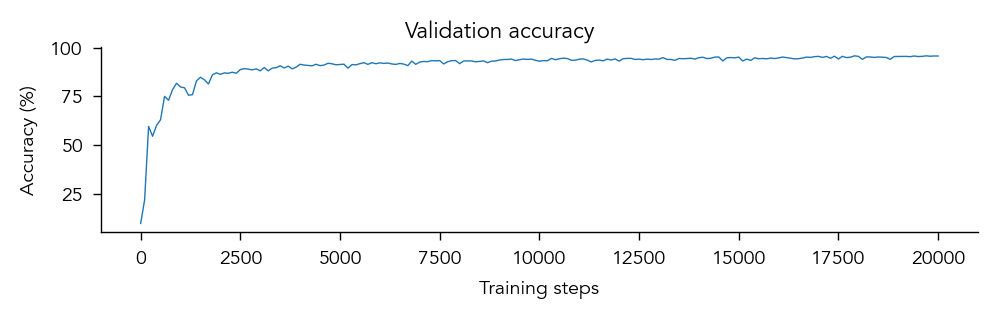

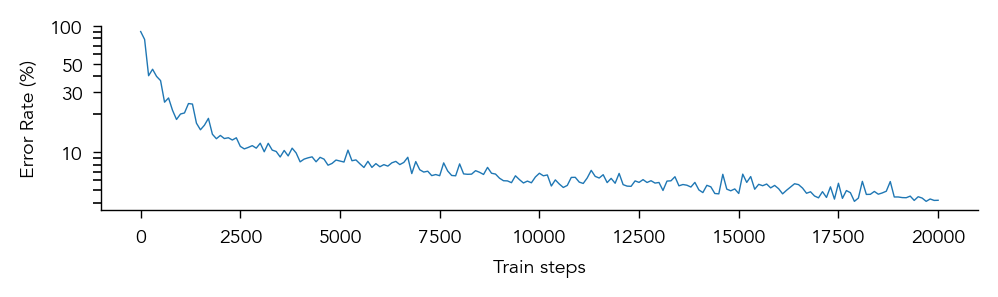

In [5]:
eiann.plot_loss_history(network, ylim=(-0.01, 0.2))
eiann.plot_accuracy_history(network)
eiann.plot_error_history(network)

  0%|          | 0/400 [00:00<?, ?it/s]

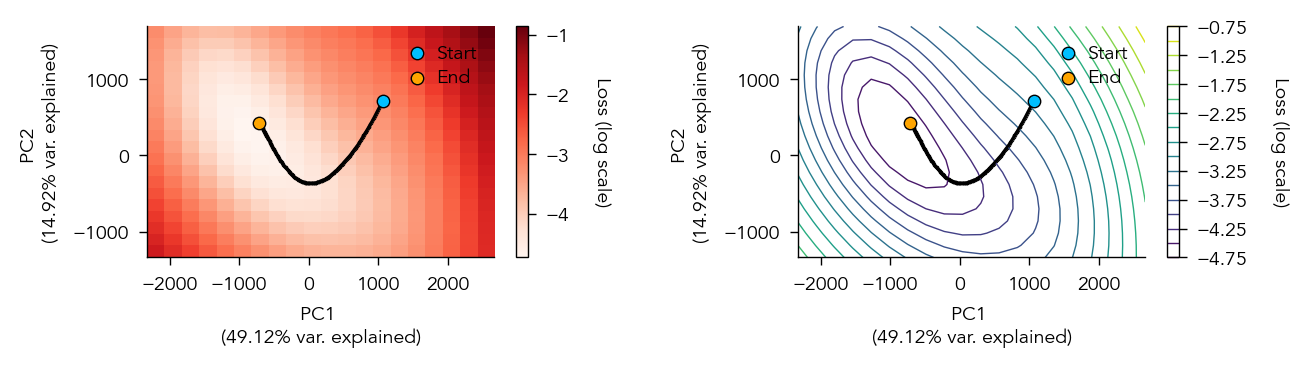

In [6]:
eiann.plot_loss_landscape(test_dataloader, network, num_points=20, extension=0.9, vmax_scale=1.2, scale='log')

### 4. Analyze population activities

Batch accuracy = 95.36000061035156%


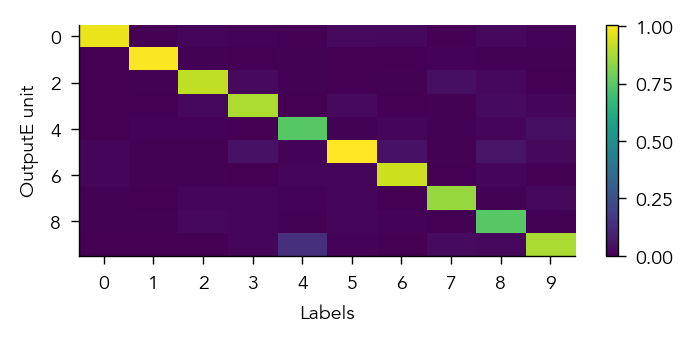

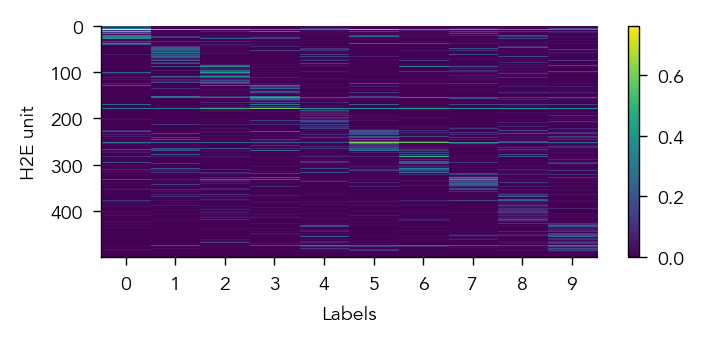

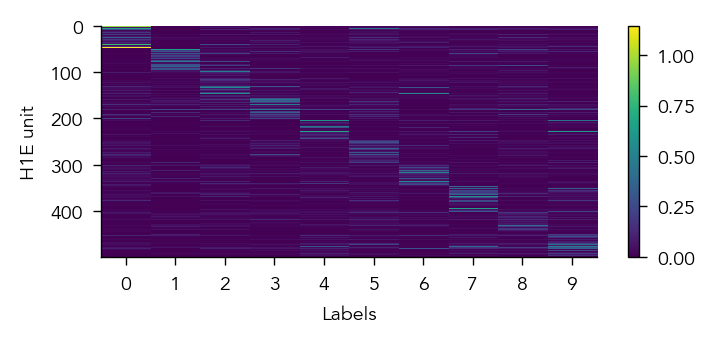

In [7]:
eiann.plot_batch_accuracy(network, test_dataloader, population='E')

torch.Size([15, 10000, 500])


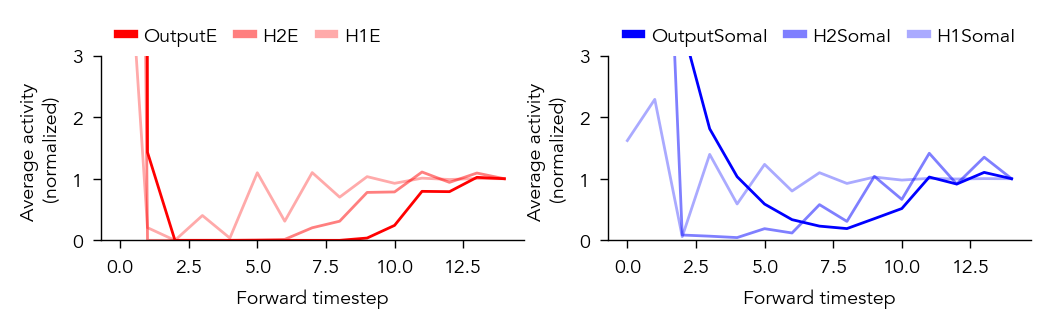

In [8]:
pop_dynamics_dict = ut.compute_test_activity_dynamics(network, test_dataloader, plot=True, normalize=True) # We will evaluate the network dynamics by presenting the test dataset and recording the neuron activity.
print(pop_dynamics_dict['H1E'].shape) # Since we are store the dynamics here, each population should have activity of shape (timesteps, data samples, neurons)

### 5. Analyze learned representations

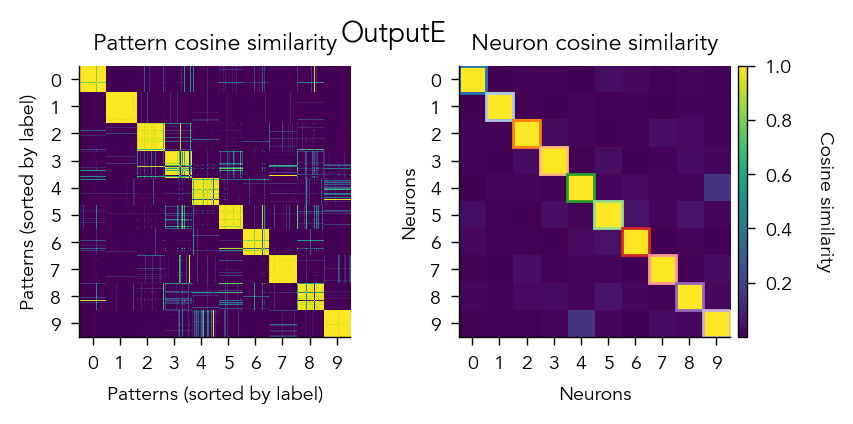

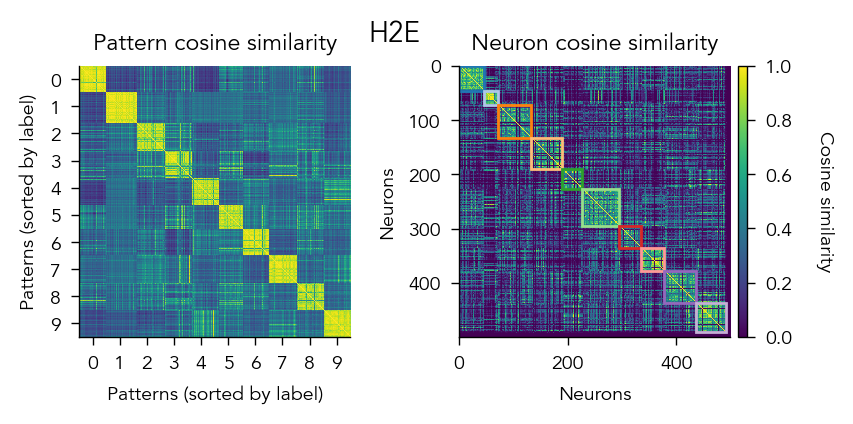

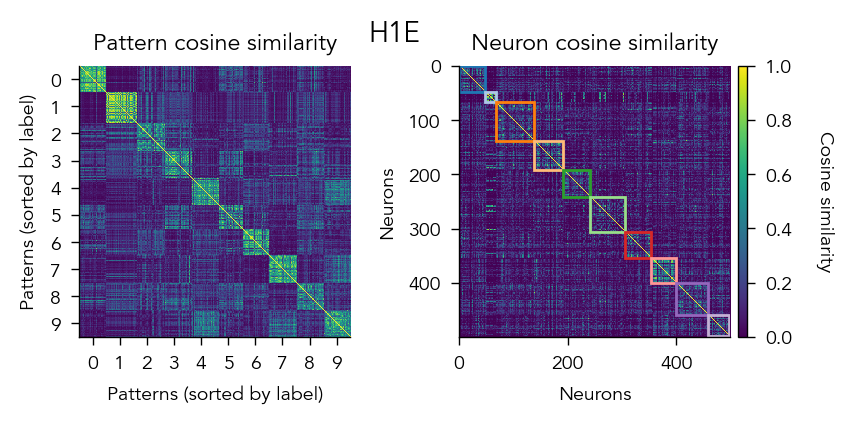

In [9]:
pop_activity_dict, pattern_labels, unit_labels_dict = ut.compute_test_activity(network, test_dataloader, class_average=False, sort=True)
pattern_similarity_matrix_dict, neuron_similarity_matrix_dict = ut.compute_representational_similarity_matrix(pop_activity_dict, pattern_labels, unit_labels_dict, population='E', plot=True)

#### 5.1 Hidden Layer 1

Optimizing receptive field images H1E...


  0%|          | 0/1000 [00:00<?, ?it/s]

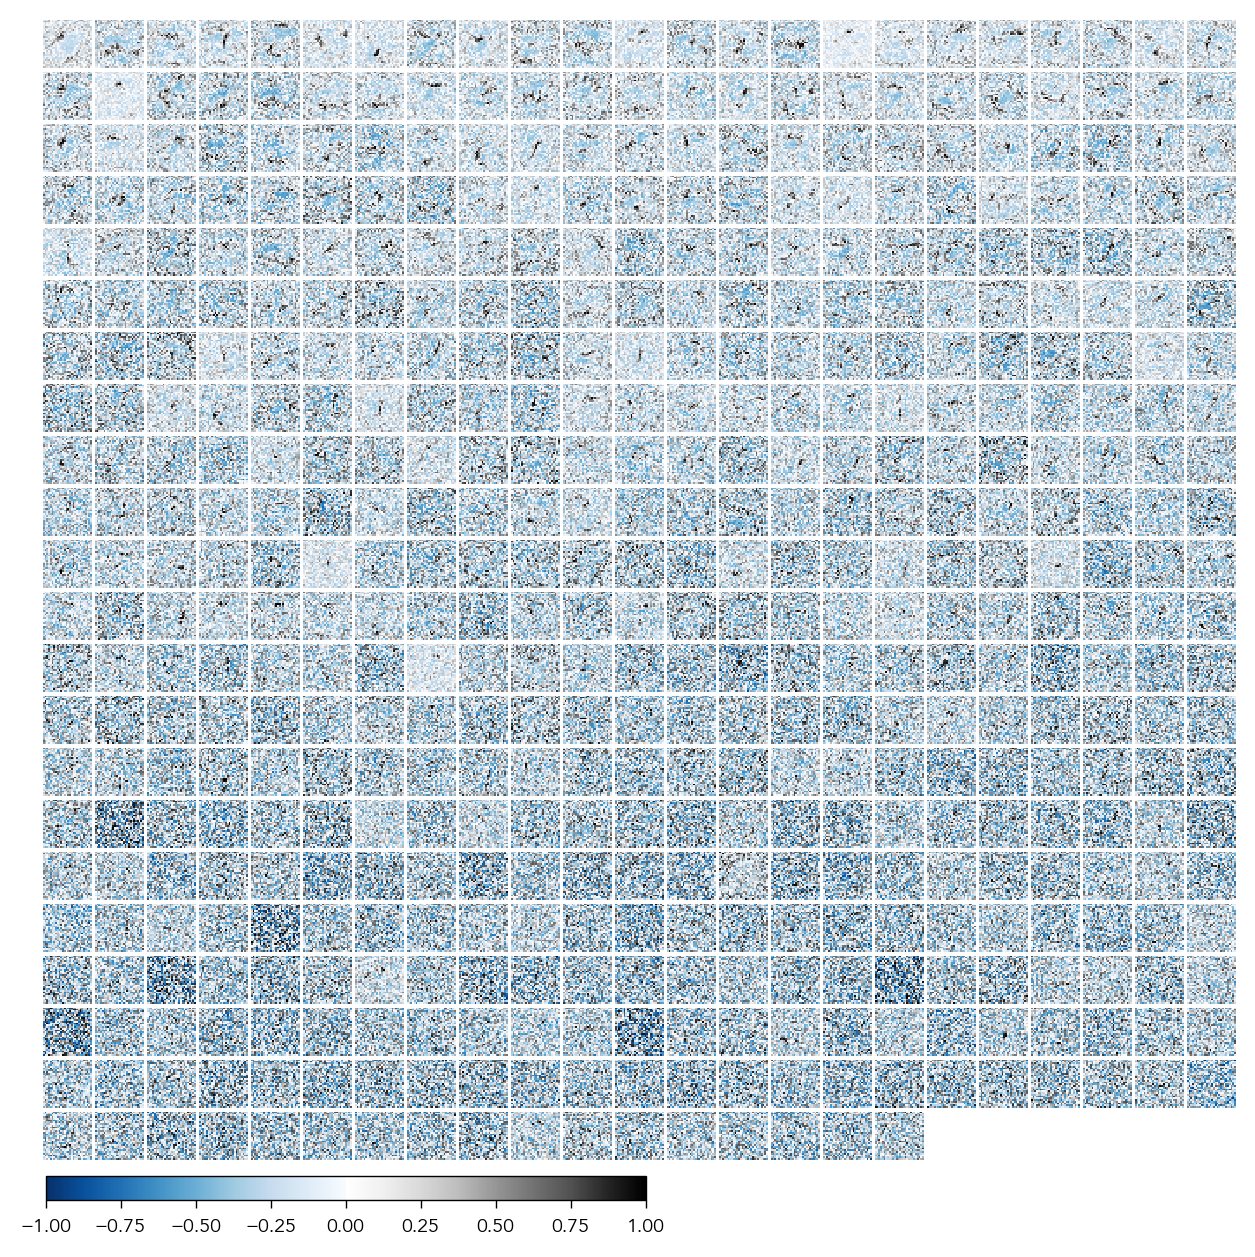

In [22]:
receptive_fields_H1 = ut.compute_maxact_receptive_fields(network.H1.E, test_dataloader=test_dataloader)
eiann.plot_receptive_fields(receptive_fields_H1, sort=True)

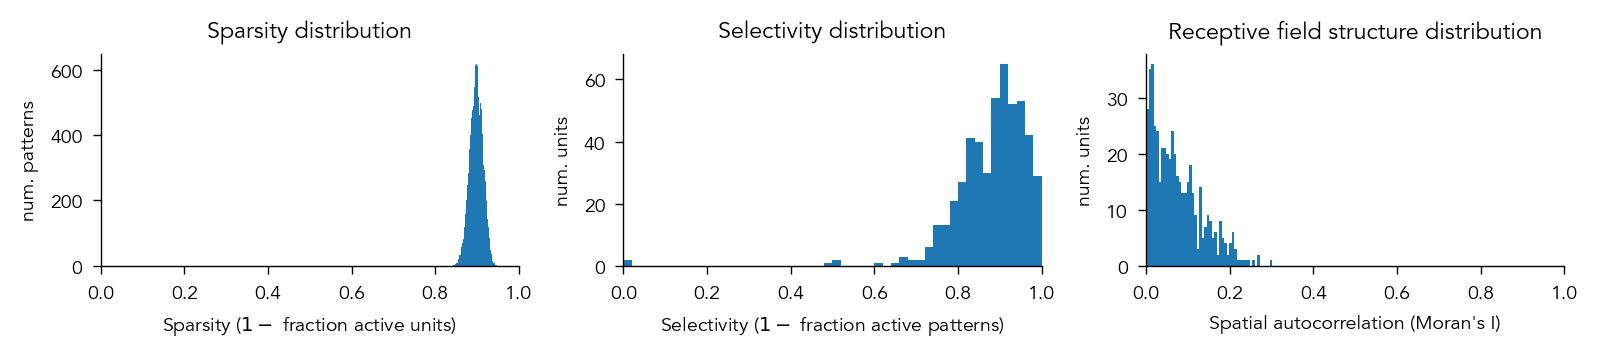

In [23]:
metrics_dict = ut.compute_representation_metrics(population=network.H1.E, dataloader=test_dataloader, receptive_fields=receptive_fields_H1, plot=True)

#### 5.2 Hidden Layer 2

Optimizing receptive field images H2E...


  0%|          | 0/1000 [00:00<?, ?it/s]

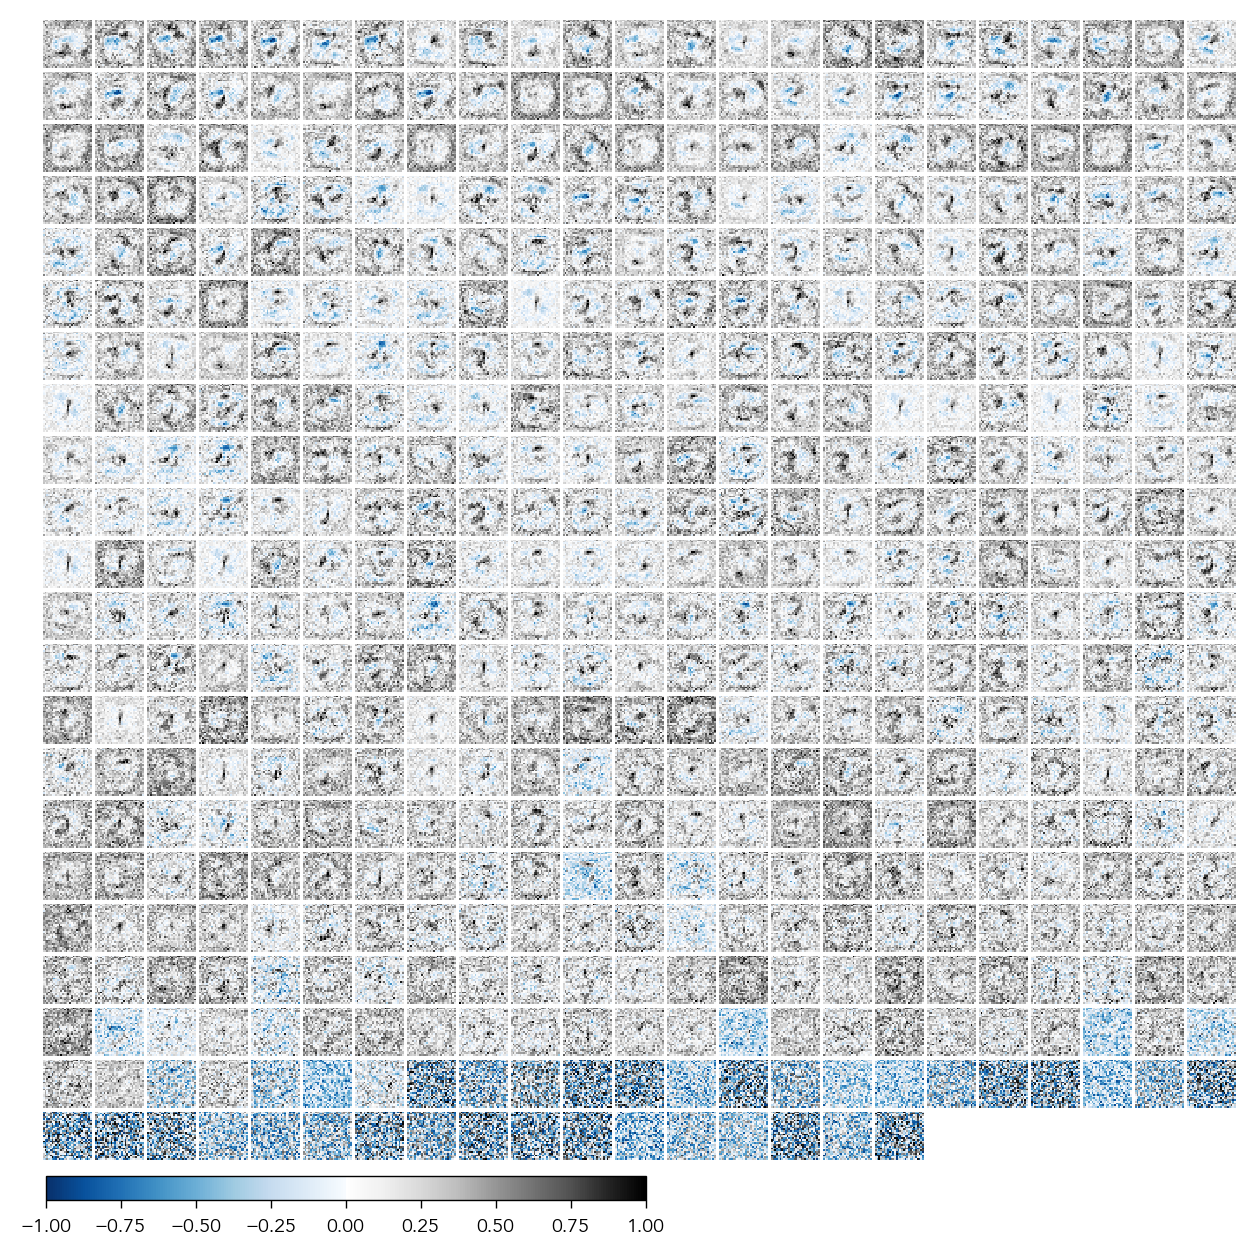

In [24]:
receptive_fields_H2 = ut.compute_maxact_receptive_fields(network.H2.E, test_dataloader=test_dataloader)
eiann.plot_receptive_fields(receptive_fields_H2, sort=True)

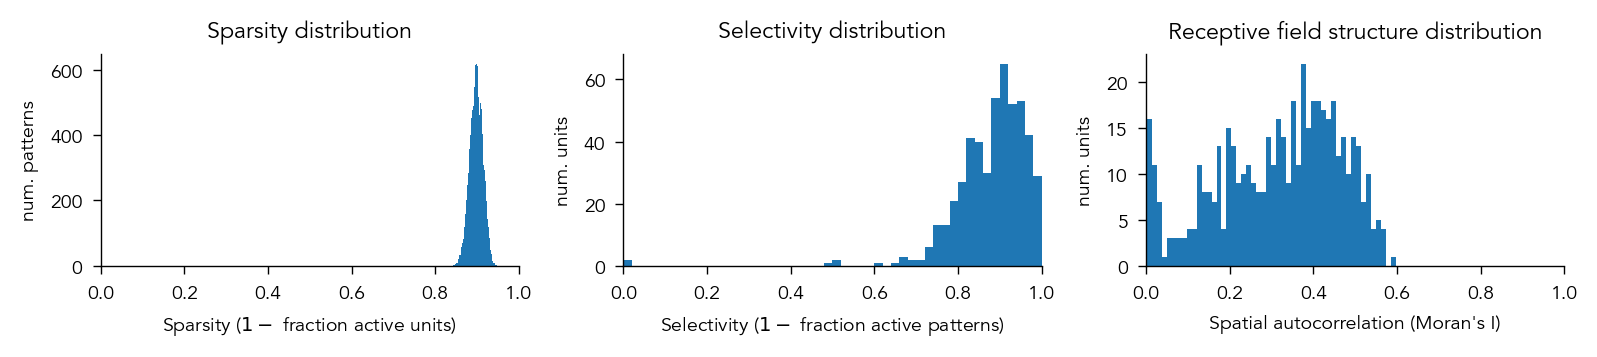

In [25]:
metrics_dict = ut.compute_representation_metrics(population=network.H1.E, dataloader=test_dataloader, receptive_fields=receptive_fields_H2, plot=True)

#### 5.3 Output layer

Optimizing receptive field images OutputE...


  0%|          | 0/1000 [00:00<?, ?it/s]

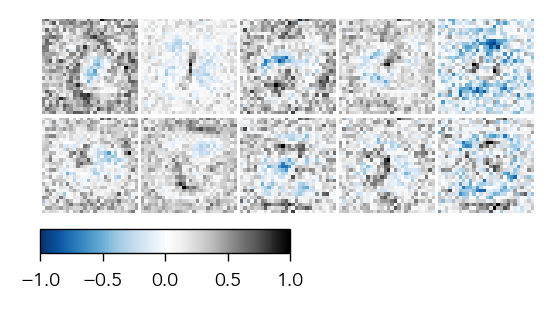

In [26]:
receptive_fields_output = ut.compute_maxact_receptive_fields(network.Output.E, test_dataloader=test_dataloader)
eiann.plot_receptive_fields(receptive_fields_output, sort=False)